In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import *
from geopy.geocoders import Nominatim
import folium
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [10]:
df = pd.read_csv('./data/data_set/맛집 데이터 3.5 이상.csv')

In [11]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,평점
0,뽀르께노 스페니쉬비스트로,4.6,성북구,서울특별시 성북구 동소문로6길 4-21 1F,다국적음식,만원-2만원,2022-07-22,맛있다,7.0,7.0,0.0,0.0,4.600000
1,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41.0,35.0,6.0,0.0,3.841463
2,계모임,4.5,성북구,서울특별시 성북구 보문로30라길 5-10 1F,한식,만원-2만원,5 일 전,맛있다,10.0,10.0,0.0,0.0,4.500000
3,옥돌,4.5,성북구,서울특별시 성북구 동소문로17길 11,양식,만원-2만원,2022-07-18,맛있다,5.0,5.0,0.0,0.0,4.500000
4,우정초밥,4.4,성북구,서울특별시 성북구 종암로3길 31 1F,일식,2만원-3만원,2022-06-18,맛있다,31.0,28.0,3.0,0.0,3.974194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,고바우덩어리생고기,4.2,구로구,서울특별시 구로구 부일로1길 9,한식,만원-2만원,2022-07-25,맛있다,6.0,6.0,0.0,0.0,4.200000
767,춘자싸롱,4.7,구로구,서울특별시 구로구 디지털로32나길 11,한식,만원-2만원,2020-10-15,맛있다,14.0,13.0,1.0,0.0,4.364286
768,부뚜막청국장,4.0,구로구,서울특별시 구로구 구로중앙로28길 24,한식,만원-2만원,2021-06-16,맛있다,11.0,10.0,1.0,0.0,3.636364
769,이미커피,4.7,구로구,서울특별시 구로구 디지털로27길 116 101호,카페/디저트,만원 미만,2021-09-13,맛있다,4.0,4.0,0.0,0.0,4.700000


<AxesSubplot:title={'center':'구별 맛집 수'}, xlabel='count', ylabel='구'>

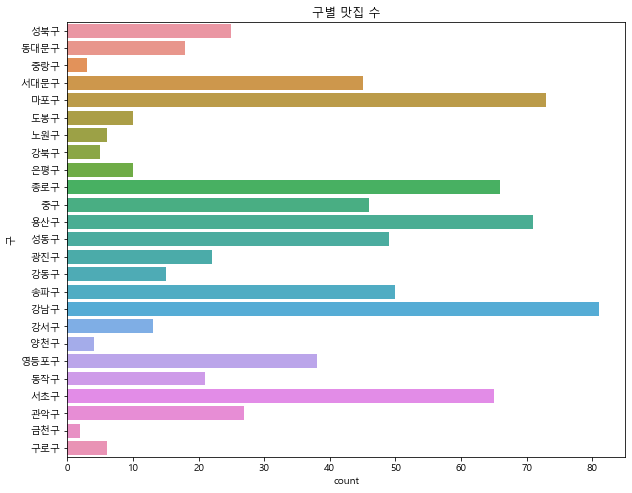

In [12]:
plt.figure(figsize=(10,8))
plt.title('구별 맛집 수')
plt.xlabel('맛집수')
plt.ylabel('도시')
sns.countplot(y="구", data=df)

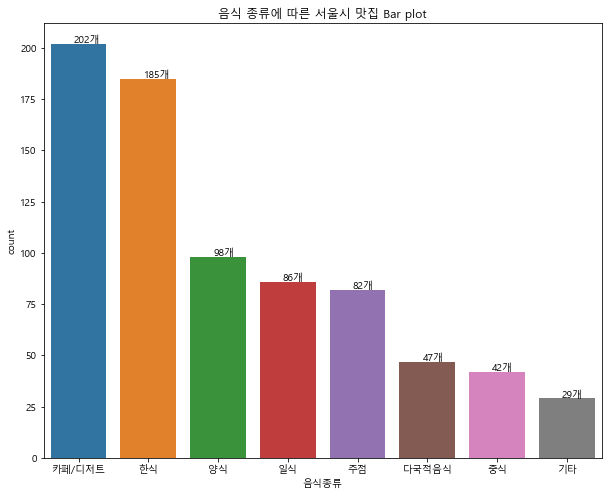

In [13]:
ordered_index = df.value_counts('음식종류').index
plt.figure(figsize=(10, 8))
ax1 = sns.countplot(x='음식종류', data=df, order=ordered_index)

plt.title('음식 종류에 따른 서울시 맛집 Bar plot')
plt.xlabel('음식종류')

    
for p in ax1.patches:
    ax1.annotate('{:.0f}개'.format(p.get_height()), (p.get_x() + 0.33, p.get_height() + 0.5))

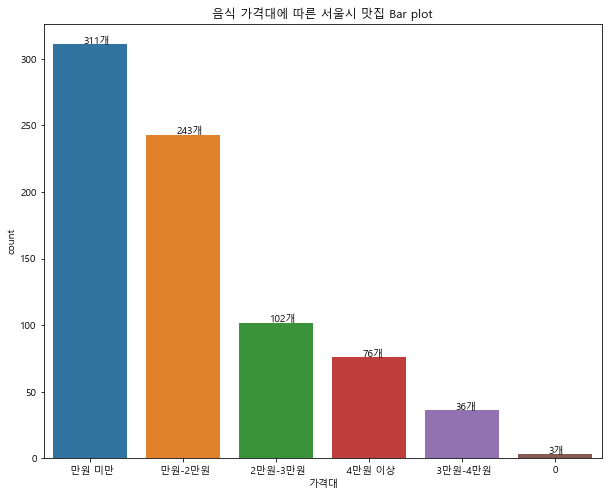

In [14]:
ordered_index = df.value_counts('가격대').index
plt.figure(figsize=(10, 8))
ax1 = sns.countplot(x='가격대', data=df, order=ordered_index)

plt.title('음식 가격대에 따른 서울시 맛집 Bar plot')
plt.xlabel('가격대')


for p in ax1.patches:
    ax1.annotate('{:.0f}개'.format(p.get_height()), (p.get_x() + 0.33, p.get_height() + 0.5))

In [37]:
i = 0
address = []

for i in range(len(df['주소'])):
    a = df.loc[i, '주소'].split(' ')
    address.append(" ".join(a[1:5]))

In [38]:
geo_local = Nominatim(user_agent='South Korea')

# 주소 -> 위도, 경도 반환
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [39]:
#####주소를 위,경도 값으로 변환하기 #####
latitude = []
longitude =[]
i = 0
for i in address:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

In [40]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in df.index:
    folium.Marker(
        [latitude[n],longitude[n]],
        radius = 10, 
        color='#3186cc',
        fill_color='#3186cc', 
        fill=True,
        tooltip  = ('<b>- 지역</b>: ' + df['구'][n] + '<br>' +
                 '<b>- 상호명</b>: ' + df['식당명'][n] + '<br>' + 
                 '<b>- 음식분류</b>: ' + df['음식종류'][n] + '<br>' + 
                   '<b>- 가격대</b>: ' + df['가격대'][n])
    ).add_to(map)
map

In [15]:
df1 = pd.DataFrame(df['구'].value_counts())
df1.rename(columns = {'구' : '맛집수'}, inplace = True)

In [28]:
#한국 지도 데이터 이용해서 단계 구분도 그리기
import json
#한국지도 경계의 json data 파일 가져오기
#한글이 포함된경우에는 그냥 path만 연결하면 인코딩 문제 발생
#json.load( encoding='utf-8') 이용해서 변수에 data 저장 후 사용하는 것이 일반적

geo_path='./data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))
# geo_str

#서울을 중심으로 기본 지도 출력
#위경도[37.5502,126.982]
map=folium.Map(location=[37.5502,126.982],
               zoom_start=11,)
               #tiles='Stamen Terrain')

# map

#단계 구분도 data 읽어오기
#csv 읽어오기 : pd.read_csv(경로포함파일명,encoding=,index_col='지정인덱스 필드명')
f_test=df1

In [29]:
map.choropleth(geo_data=geo_str,
               data=f_test,
               columns=[f_test.index,'맛집수'],
               key_on = 'feature.id',
               fill_color='BuPu',
               legend_name='구 별 맛집 수')
folium.LayerControl().add_to(map)
map

In [4]:
Fin_df = pd.read_csv('./data/data_set/구별 인구수와 맛집수.csv')

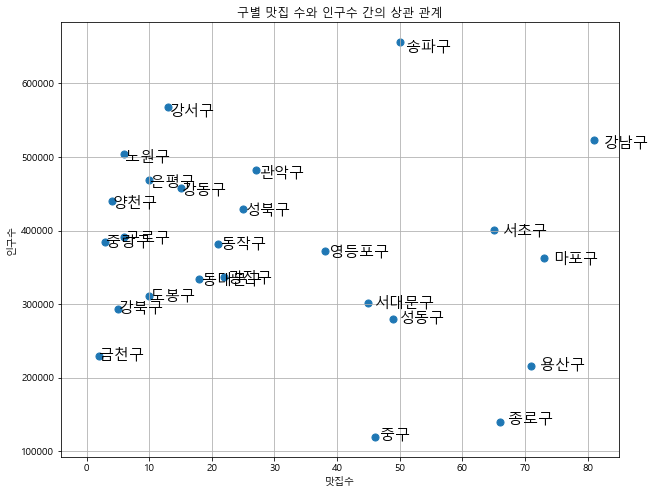

In [5]:
fp1 = np.polyfit(Fin_df['구별맛집수'], Fin_df['총 인구수'],1)
fp1

f1 = np.poly1d(fp1)
fx = np.linspace(0, 200, 1)

plt.figure(figsize=(10,8))
plt.scatter(Fin_df['구별맛집수'], Fin_df['총 인구수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    plt.text(Fin_df['구별맛집수'][n]*1.02, Fin_df['총 인구수'][n]*0.98, 
             Fin_df.loc[n, '구'], fontsize=15)
    
plt.title("구별 맛집 수와 인구수 간의 상관 관계")   
plt.xlabel('맛집수')
plt.ylabel('인구수')
plt.grid()
plt.show()

In [6]:
print(pearsonr(Fin_df['구별맛집수'], Fin_df['총 인구수']))

(-0.16469139384870915, 0.4314614157202909)


In [19]:
population = pd.read_csv('./data/data_set/구별 사업체종사자수와 맛집수.csv')
company = pd.read_csv('./data/data_set/구별 사업체수와 맛집수.csv')

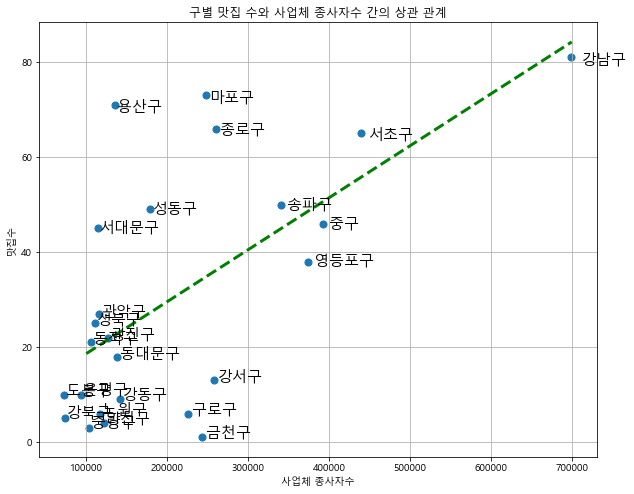

In [20]:
fp1 = np.polyfit(population['사업체종사자수'], population['맛집수'],1)
fp1

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(10,8))
plt.scatter(population['사업체종사자수'], population['맛집수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    plt.text(population['사업체종사자수'][n]*1.02, population['맛집수'][n]*0.98, 
             population.loc[n, '구'], fontsize=15)
    
plt.title("구별 맛집 수와 사업체 종사자수 간의 상관 관계")   
plt.xlabel('사업체 종사자수')
plt.ylabel('맛집수')
plt.grid()
plt.show()

In [35]:
print(pearsonr(population['맛집수'], population['사업체종사자수']))

(0.6251416857877897, 0.0008339021081624285)


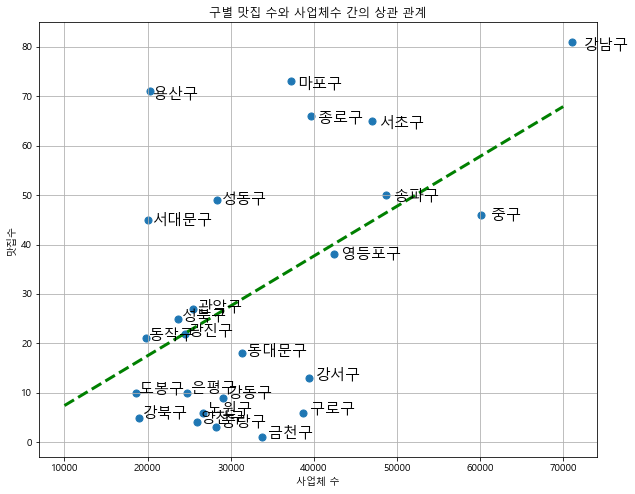

In [21]:
fp1 = np.polyfit(company['사업체수'], company['맛집수'],1)
fp1

f1 = np.poly1d(fp1)
fx = np.linspace(10000, 70000, 10)

plt.figure(figsize=(10,8))
plt.scatter(company['사업체수'], company['맛집수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    plt.text(company['사업체수'][n]*1.02, company['맛집수'][n]*0.98, 
             company.loc[n, '구'], fontsize=15)
    
plt.title("구별 맛집 수와 사업체수 간의 상관 관계")   
plt.xlabel('사업체 수')
plt.ylabel('맛집수')
plt.grid()
plt.show()

In [36]:
print(pearsonr(company['맛집수'], company['사업체수']))

(0.5190069873532723, 0.007850065973888647)


In [14]:
df_sub = pd.read_csv('./data/data_set/맛집 인접역 추가(전체).csv')
sub_ex = pd.DataFrame(df_sub.인접역까지의거리.value_counts())
sub_ex.rename(columns = {'인접역까지의거리' : '인접역수'}, inplace = True)
sub_ex['인접역까지의거리'] = sub_ex.index

sub_ex = sub_ex.sort_values('인접역까지의거리')
sub_ex.reset_index(inplace = True, drop=True)
tmp = sub_ex[sub_ex['인접역수'] == 7].index
sub_ex = sub_ex.drop(tmp)

In [15]:
dis = sub_ex['인접역까지의거리'].to_list()
data = dis
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3]
labels = ['0.5이하', '1이하', '1.5이하', '2이하', '2.5이하', '3이하']
cats = pd.cut(data, bins, labels = labels)
cat_list = list(cats)

In [16]:
from collections import Counter
a = []
b = []
result = Counter(cat_list)

for key in result:
    a.append(key)
    b.append(result[key])

df_dis = pd.DataFrame((zip(a, b)), columns = ['거리', '수'])

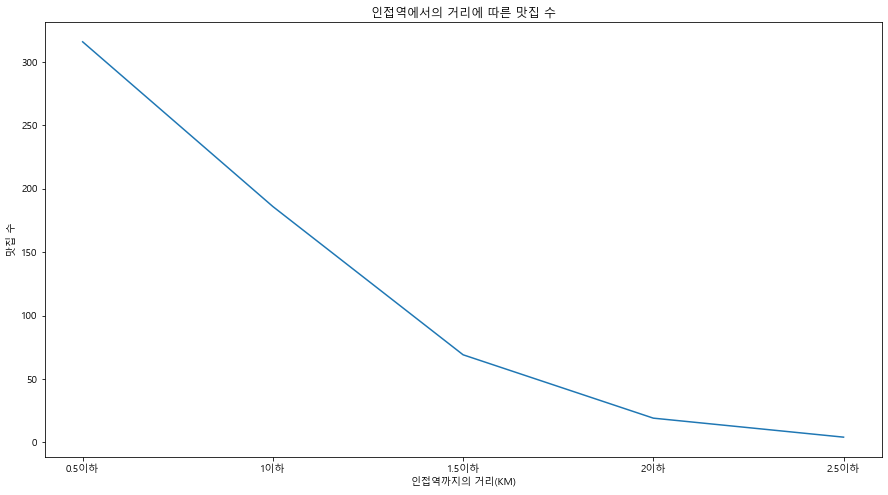

In [17]:
plt.figure(figsize=(15, 8))
plt.plot(df_dis['거리'], df_dis['수'])

plt.xlabel('인접역까지의 거리(KM)')
plt.ylabel('맛집 수')
plt.title('인접역에서의 거리에 따른 맛집 수')
plt.show()

In [29]:
campus = pd.read_csv('./data/맛집 데이터 인접 대학교 추가.csv')

In [31]:
ex1 = pd.DataFrame(campus.인접대학교까지의거리.value_counts())
ex1.rename(columns = {'인접대학교까지의거리' : '인접대학수'}, inplace = True)
ex1['인접대학교까지의거리'] = ex1.index

ex1 = ex1.sort_values('인접대학교까지의거리')
ex1.reset_index(inplace = True, drop=True)
tmp = ex1[ex1['인접대학수'] == 7].index
ex1 = ex1.drop(tmp)

In [32]:
dis = ex1['인접대학교까지의거리'].to_list()
data = dis
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
labels = ['0.5이하', '1이하', '1.5이하', '2이하', '2.5이하', '3이하', '3.5이하', '4이하', '4.5이하']
cats = pd.cut(data, bins, labels = labels)
cat_list = list(cats)

In [34]:
from collections import Counter
a = []
b = []
result = Counter(cat_list)

for key in result:
    a.append(key)
    b.append(result[key])

df_cam = pd.DataFrame((zip(a, b)), columns = ['거리', '수'])
df_cam = df_cam.drop(0, axis = 0)

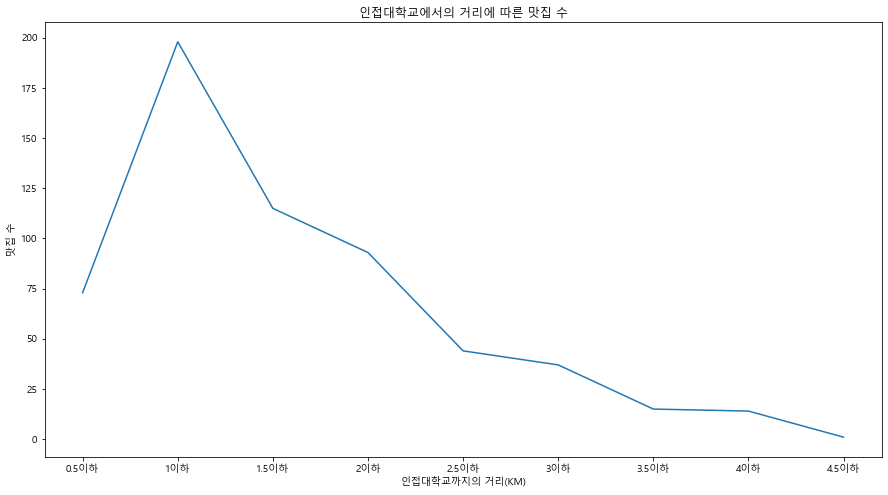

In [36]:
plt.figure(figsize=(15, 8))
plt.plot(df_cam['거리'], df_cam['수'])

plt.xlabel('인접대학교까지의 거리(KM)')
plt.ylabel('맛집 수')
plt.title('인접대학교에서의 거리에 따른 맛집 수')
plt.show()

In [24]:
jd = pd.read_csv('./data/data_set/GDP와 평균가격.csv')
jd.drop('Unnamed: 0', axis=1,inplace=True)

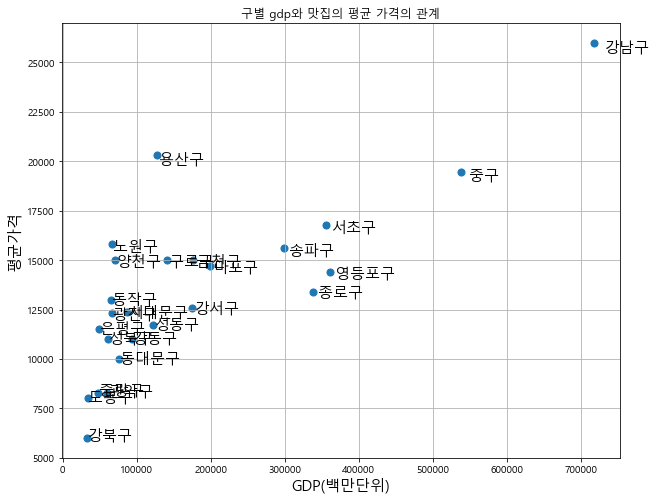

In [27]:
fp1 = np.polyfit(jd['GDP'], jd['평균가격'],1)
fp1

f1 = np.poly1d(fp1)

plt.figure(figsize=(10,8))
plt.scatter(jd['GDP'], jd['평균가격'], s=50)

for n in range(25):
    plt.text(jd['GDP'][n]*1.02, jd['평균가격'][n]*0.98, 
             jd.loc[n, '구'], fontsize=15)   
plt.title("구별 gdp와 맛집의 평균 가격의 관계")   
plt.xlabel('GDP(백만단위)',fontsize=15)
plt.ylabel('평균가격',fontsize=15)
plt.grid()
plt.show()

In [26]:
print(pearsonr(jd['GDP'], jd['평균가격']))

(0.7749689505099895, 5.402980422199216e-06)
